<div style="padding: -5px;
  text-align: center;
  color: white;
  font-size: 15px;">
   <img src="images/banner.jpg" alt="MINE-Seminario de programación" style="width:100%;">
  <h1 style="
  position: absolute;
  top: 5%;
  left: 50%;">Introducción a la simulación</h1>
</div>


La consecución de datos en ocasiones resulta ser una tarea titánica o improbable. Por ejemplo, si quisiéramos establecer la mejor estrategia de negocios para vender aguacates en el exterior nos vemos enfrentados a reconocer que la volatilidad del peso frente a las monedas extranjeras no permite que conozcamos un valor exacto de los ingresos, en este caso, los datos de proyección estarían condicionados al comportamiento de la moneda y es improbable que sepamos con exactitud como se vendería el aguacate así conozcamos de antemano las cantidades demandadas. Ahora bien, también se asumen riesgos de transporte y colocación del producto, seguramente una parte de la entrega no llegará en condiciones óptimas y habrá una pérdida según la negociación. En este caso es poco probable tener una idea de las pérdidas que se tendrán o la volatilidad del peso, entonces ¿Cómo aseguramos una proyección de ingreso?

La probabilidad es la respuesta, dependemos de un tipo de modelos que no procuran una respuesta directa, sino que van asociados a una incertidumbre generada por varios tipos de errores o por el desconocimiento de todas las variables o simplemente, por si trabaja en física cuántica, por la aleatoriedad intrínseca en la naturaleza. En el caso de nuestro problema, no consideramos una sola solución o un único devenir de nuestro asunto, más bien consideramos muchos escenarios y a partir de distribuciones de probabilidad, escogidas de acuerdo con la situación que planteamos, establecemos un rango de posibilidades en el que estará nuestra solución.

Este ojo de Agamotto fue presentado por primera vez en 1949 por el matemático prominente con un único defecto, John Von Neumman y el exponente polaco Stanislaw Ulam como la simulación de Montecarlo. Un método para aproximar soluciones a partir de la generación de números aleatorios. En este cuaderno veremos como generar esos números y algunos elementos conceptuales alrededor de las aplicaciones de estos métodos. Posteriormente veremos otro tipo de simulación un poco más sofisticada asociada a agentes.

In [1]:
# Paquetes
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Distribuciones de probabilidad

Recordemos que una distribución de probabilidad es una función, que asigna a cada suceso que representa la variable la probabilidad de que éste ocurra.

Las distribuciones de probabilidad se pueden agrupar según el tipo de variable que se está estudiando

**Para variables aleatorias discretas**
Tengamos presente que las variables aleatorias discretas son aquellas que representan una cantidad *contable* de sucesos.

### Distribución binomial
La distribución binomial se caracteriza por tener un experimento con dos posibles resultados, *éxito* con probabilidad de ocurrencia $p$, y *fracaso* con probabilidad $1-p$, el cual se repite $n$ veces de manera independiente.

Para representar que una variable aleatoria $X$ sigue una distribución binomial de parámetros $n$ y $p$, se escribe:

$${\displaystyle X\sim B(n,p)\,}$$

Su función de probabilidad es:
$${\displaystyle \!f(x)={n \choose x}p^{x}(1-p)^{n-x},\,\,\,\,0\leq p\leq 1}$$
donde ${\displaystyle x=\{0,1,2,\dots ,n\},}$


**Ejemplo**

Supongamos que se lanza un dado equilibrado (de 6 caras) 60 veces y queremos conocer la probabilidad de que el número 2 salga 10 veces.

Un ensayo de nuestro problema consiste en lanzar el dado una vez, si se considera como éxito obtener un 3 y fracaso si no sale 3. Definiendo $X:=$ el número de veces que se obtiene un 2 en 60 lanzamientos.

De lo anterior se puede afirmar que $X \sim B(60, 1/6)$ y la probabilidad a calcular es $P(X=10)$:

$${\displaystyle \!P(X=10)={60\choose 10}(1/6)^{10}(1-1/6)^{60-10}=0.0000744\,\!}\approx0.137013.$$

Para utilizar ésta y las demás distribuciones de probabilidad en Python debemos trener presente lo siguiente:

Se trabajará con el paquete `scipy.stats`, principalmente con las funciones: 

`cdf(x)`: Función de distribución F(X)

`sf(x)`: 1 - cdf(x)

`pmf(x)`: Función de probabilidad f(x) (distribuciones discretas)

`pdf(x)`: Función de densidad f(x) (distribuciones continuas)

`ppf(x)`: Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

Para resolver el problema anterior con el uso de Python debemos seguir los siguientes pasos:

In [2]:
X = ss.binom(1000,1/6)

In [3]:
X.pmf(10)

1.7769918774316006e-63

In [4]:
X60= ss.binom(1,1/6)

In [5]:
X60.pmf(10)

0.0

Es decir la probabilidad es del 13.70%

#### Números aleatorios a partir de la binomial

En este apartado usaremos numpy.random para generar una sucesión de 1000 números que se escogen según una distribución binomial. En este sentido, resolveremos el problema anterior a partir de esa escogencia.


In [6]:
bin_rand=np.random.binomial(60,1/6,size=1000)

**Ejercicio 1**

Crear un programa para estudiar la distribución en el arreglo anterior. Un histograma es uti, sin embargo como la distribución es discreta es util calcular una tabla de frecuencias.

```Python
#recomendaciones

np.count_nonzero()
np.unique()
np.sum()
```

In [7]:
np.random.seed(2021) #semilla
bin_rand=np.random.binomial(60,1/6,size=1000)
np.unique(bin_rand)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 22])

In [8]:
bin_rand

array([11, 12,  7,  9, 19,  7,  7, 12, 11, 12,  6,  6, 15, 11,  6, 10, 11,
       15, 10,  9, 10,  8, 10,  7, 11, 10, 10, 13, 12,  6, 11, 11, 13,  8,
       11, 11,  8, 13, 11, 16,  9,  7, 10,  9, 14, 12, 14, 11, 11,  9, 13,
        8,  8,  8,  8, 11,  7,  9, 11, 13,  6,  9,  9, 12, 10, 12,  6, 13,
       12, 12,  6, 11, 12,  8,  9, 13, 11, 12,  9,  9,  9,  8, 11, 10, 16,
        9,  9, 16, 13,  8, 13, 10, 12, 13, 10, 10, 11,  9, 11, 10,  7, 16,
       10,  7, 13,  7,  8, 11, 12,  7,  9, 12, 13, 12, 13,  8,  7, 11, 12,
        7,  8,  9, 10, 11, 12,  6,  8, 11, 14, 12, 13, 11, 11, 13, 11, 13,
        9, 11, 14,  6, 11,  6,  8, 13, 10, 12, 13, 12, 11, 10, 12,  5,  9,
       15, 15, 11, 12,  7, 11,  6, 11,  9,  9, 13, 12,  4, 12, 14, 15,  6,
       11,  9,  9, 10, 11,  9,  8, 11, 11,  8, 10,  7, 18,  8, 12, 10, 11,
       11, 12, 12,  8,  9,  3,  9, 14, 12,  9,  6,  8, 11,  4,  7, 10, 14,
       13,  8, 11,  8,  8, 11,  5, 14,  6, 13,  9,  9, 11,  7,  8,  9,  9,
        9,  8, 12,  8,  8

creando un array con las frecuencias de los datos asignados aleatoriamente en el bloque de código anterior.

In [9]:
import numpy as np
unique, counts = np.unique(bin_rand, return_counts=True)
frec=np.asarray((unique, counts)).T

Creando un Dataframe que alojara los valores y las frecuencias del anterior array

In [10]:
import pandas as pd
df_frec = pd.DataFrame(frec)
df_frec.set_axis(['valor', 'frecuencia'], 
                    axis='columns', inplace=True)
df_frec

,valor,frecuencia
0,1,1
1,2,2
2,3,3
3,4,12
4,5,24
5,6,54
6,7,92
7,8,119
8,9,135
9,10,123


**Ejercicio 2**

Dar una respuesta aproximada del ejercicio anterior a partir del arreglo `bin_rand`.

Calculando la probailidad para cada uno de los valores de la variable discreta

In [11]:
df_frec['probabilidad']=df_frec['frecuencia']/len(bin_rand)

### Respuesta

In [12]:
df_frec

,valor,frecuencia,probabilidad
0,1,1,0.001
1,2,2,0.002
2,3,3,0.003
3,4,12,0.012
4,5,24,0.024
5,6,54,0.054
6,7,92,0.092
7,8,119,0.119
8,9,135,0.135
9,10,123,0.123


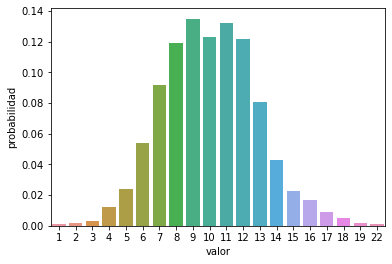

In [13]:
# plot PMF as barplot
ax = sns.barplot(
    x='valor',
    y='probabilidad',
    data=df_frec,
)
plt.savefig("pmf")

### Distribución de Poisson
Es una distribución de probabilidad discreta que a partir de una frecuencia de ocurrencia media, sirve para hallar la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

Para representar que una variable aleatoria $X$ sigue una distribución de Poisson con parámetro $\lambda$, el cual representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado, usaremos la siguiente notación:

$${\displaystyle X\sim Poi(\lambda)},$$

La función de masa de probabilidad de la distribución de Poisson es

$${\displaystyle f(k,\lambda )={\frac {e^{-\lambda }\lambda ^{k}}{k!}}}$$

siendo $k$ el número de ocurrencias del evento. 

**Ejemplo**

Si el 1% de los libros encuadernados tiene defectos, para obtener la probabilidad de que 10 de 800 libros encuadernados en este taller tengan encuadernaciones defectuosas usamos la distribución de Poisson.

En tal caso $k=10$, $\lambda=8$ ya que es el $1\%$ de $800$
por lo tanto
$${\displaystyle P(10;8)={\frac {8^{10}e^{-8}}{10!}}\approx0,0992615.}$$

In [14]:
X = ss.poisson(8) 
# λ = 8 =el cual representa el número de veces que se espera que ocurra el fenómeno
X.pmf(10)
#𝑘  el número de ocurrencias del evento

0.09926153383153544

Es decir la probabilidad es del 9.92%

### Números aleatorios a partir de Poisson
Replicamos el ejercicio anterior pero con la distribución de Poisson. Pero aquí usaremos una semilla usando la función `np.random.seed()`

In [15]:
# Iniciar semilla 
np.random.seed(2021) 

Calculate the absolute difference between their mean and lambda using the `np.mean()` and `abs()`.

In [16]:
poi_ran=np.random.poisson(8,1000)

In [17]:
poi_ran

array([ 7,  6, 10, 10, 14,  8,  9, 10, 15,  7, 10,  8, 13, 11,  9,  7, 10,
       11,  7,  9,  7,  7, 15, 12,  7,  6, 11,  3,  8,  7,  6, 13,  7,  7,
       11,  7,  5,  5,  8,  9, 11,  4,  7, 14,  6,  9,  9,  7, 10,  8,  9,
        8,  7, 11,  4,  7,  5,  7, 12, 10,  3,  5,  8,  7,  2,  6,  8, 10,
        5,  8,  6,  4, 11,  7,  7,  6,  8, 11,  6,  9,  5,  5,  5,  8,  6,
       14,  8, 14,  8,  3, 10,  8, 14, 10, 14, 13,  5, 11,  6,  7,  9,  9,
        7,  9, 11,  1,  8,  2,  8, 13,  9, 12,  4,  7, 11,  7,  6,  8,  9,
        7,  6,  6, 10,  5,  9,  8,  0, 10,  5,  8, 12,  5, 12,  2, 10,  9,
        4, 12,  6,  8, 10,  9,  9,  6,  5,  9,  4,  7, 10,  4, 10,  4,  4,
       11,  8,  9,  7, 12,  8,  3,  8,  8,  8,  7,  7,  8,  8,  5,  5, 11,
        7,  9,  9,  6, 14,  6, 11,  7,  6,  2,  9,  6,  6, 11,  7, 13, 15,
        7,  9,  8,  7, 11,  7, 10,  7, 12,  7, 11,  7,  8, 10,  8,  1,  8,
        6,  7, 14,  6, 12,  7,  7, 10,  8, 13,  9,  8, 10,  7, 13, 10, 13,
       13,  4,  6,  7,  5

**Ejercicio 3**

Replique lo hecho en el ejercicio 2 para esta distribución y resolviendo el ejemplo propuesto.

Asignando semilla y creando los mil valores aleatorios con distribucion de Poisson con λ=8

In [18]:
np.random.seed(2021) 
poi_ran=np.random.poisson(8,1000)

creando un array con las frecuencias de los datos asignados aleatoriamente en el bloque de código anterior.

In [19]:
import numpy as np
unique, counts = np.unique(poi_ran, return_counts=True)
frec_p=np.asarray((unique, counts)).T

Creando un Dataframe que alojara los valores y las frecuencias del anterior array

In [20]:
import pandas as pd
df_frec_p = pd.DataFrame(frec_p)
df_frec_p.set_axis(['valor', 'frecuencia'], 
                    axis='columns', inplace=True)
df_frec_p

,valor,frecuencia
0,0,1
1,1,4
2,2,11
3,3,27
4,4,50
5,5,80
6,6,119
7,7,153
8,8,139
9,9,120


cálculando las probabilidades 

In [21]:
df_frec_p['probabilidad']=df_frec_p['frecuencia']/len(poi_ran)

### Respuesta

In [22]:
df_frec_p

,valor,frecuencia,probabilidad
0,0,1,0.001
1,1,4,0.004
2,2,11,0.011
3,3,27,0.027
4,4,50,0.050
5,5,80,0.080
6,6,119,0.119
7,7,153,0.153
8,8,139,0.139
9,9,120,0.120


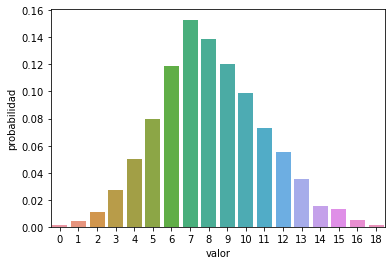

In [23]:
# plot PMF as barplot
ax = sns.barplot(
    x='valor',
    y='probabilidad',
    data=df_frec_p,
)
plt.savefig("pmf")

### Distribución hipergeométrica
Ésta es una distribución discreta relacionada con muestreos aleatorios y sin reemplazo, es decir, si se tienen $N$ elementos de los cuales, $d$ pertenecen a la categoría $A$ y los demás, $N-d$, a la categoría $B$. La distribución hipergeométrica mide la probabilidad de obtener $x$ elementos de la categoría $A$, para $({\displaystyle 0\leq x\leq d})$, en una muestra sin reemplazo de $n$ elementos de la población original.

La función de probabilidad de una variable aleatoria con distribución hipergeométrica es igual a

$${\displaystyle P(X=x)={\frac {{d \choose x}{N-d \choose n-x}}{N \choose n}}.}$$

**Ejemplo**

Se formó un jurado de 6 personas de un grupo de 20 posibles miembros de los cuales 8 eran mujeres y 12 hombres. El jurado seelecionó aleatoriamente, ¿cuál es la probabilidad de que el jurado tenga exactamente una mujer?

$$P(20,8,6;1)={\frac {{8 \choose 1}{20-8 \choose 6-1}}{20 \choose 6}}\approx 0.16346$$

In [24]:
X = ss.hypergeom(20,6,8)
X.pmf(1)

0.16346749226006166

Es decir la probabilidad es del 16.34%

### Números aleatorios a partir de hipergeométrica

**Ejercicio 4**

Haga un arreglo de 1000 números escogido según una distribución hipergemétrica.

In [25]:
??np.random.hypergeometric

In [26]:
hip_ran = np.random.hypergeometric(15, 15, 15, 100000)

In [27]:
hip_ran

array([ 6,  7,  8, ...,  8, 10,  9])

In [28]:
X = ss.hypergeom(15,15,15)
X.pmf(1)

0.0

generando el conteo de las frecuencias en un array

In [29]:
unique, counts = np.unique(hip_ran, return_counts=True)
frec_h=np.asarray((unique, counts)).T

In [30]:
frec_h

array([[    2,     9],
       [    3,   129],
       [    4,  1171],
       [    5,  5884],
       [    6, 16157],
       [    7, 26885],
       [    8, 26729],
       [    9, 15955],
       [   10,  5740],
       [   11,  1199],
       [   12,   134],
       [   13,     8]], dtype=int64)

Generando dataframe con las frecuencias 

In [31]:
df_frec_h = pd.DataFrame(frec_h)
df_frec_h.set_axis(['valor', 'frecuencia'], 
                    axis='columns', inplace=True)
df_frec_h

,valor,frecuencia
0,2,9
1,3,129
2,4,1171
3,5,5884
4,6,16157
5,7,26885
6,8,26729
7,9,15955
8,10,5740
9,11,1199


Cálculando probabilidad

In [32]:
df_frec_h['probabilidad']=df_frec_h['frecuencia']/len(poi_ran)

### Respuesta

In [33]:
df_frec_h

,valor,frecuencia,probabilidad
0,2,9,0.009
1,3,129,0.129
2,4,1171,1.171
3,5,5884,5.884
4,6,16157,16.157
5,7,26885,26.885
6,8,26729,26.729
7,9,15955,15.955
8,10,5740,5.740
9,11,1199,1.199


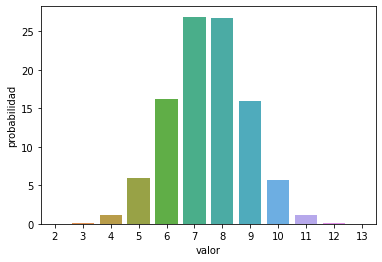

In [34]:
# plot PMF as barplot
ax = sns.barplot(
    x='valor',
    y='probabilidad',
    data=df_frec_h,
)
plt.savefig("pmf")

## Variables aleatorias continuas
Por otro lado, las variables aleatorias continuas, son las que resultan generalmente de la medición y, pueden tomar cualquier valor dentro de un intervalo.

### Distribución Normal
Es la distribución que se aplica en la mayor cantidad de situaciones, en las que se trabaje con una variable aleatoria continua en un grupo o población dada. Ejemplos de tales situaciones son, las estaturas de hombre, mujeres, variaciones en la medición de diferentes cantidades, etc.

Los parámetros que necesitamos definir para estudiar la distribución normal son $\mu$ que es la media;  $\sigma$ que representa la desviación típica, de modo que $\sigma^2$ es la varianza. Si consideramos el caso especial de la función donde ${\displaystyle \mu =0}$ y ${\displaystyle \sigma =1}$, llamaremos a tal función como distribución normal estándar.
    
$$N(x;  μ,σ) = ∫_{-∞}^{x} f(u; μ,σ) du$$
donde $f(u; μ,σ)$ es la función densidad de probabilidad:

$$f(u; μ,σ) = \frac{1}{σ\sqrt{2π}} e^{\frac{-(u-\mu)^2}{2σ^2}}$$

Muchas veces cuando no se posee un software, se hace necesario el uso de valores ya calculados que por lo general están consignados en tablas y son documentos de fácil acceso.

**Ejemplo **

Suponga que tiene un conjunto de datos aleatorios $X$ que siguen una distribución normal de media $10$ y desviación típica $2$. Se pide encontrar la probabilidad de que:

1. La variable aleatoria $x$ sea menor o igual a 8.



In [35]:
X = ss.norm(10,2)

In [36]:
X.cdf(8) # La propabilidad es del 15.86%

0.15865525393145707

2. Sea menor o igual a 10.

In [37]:
X.cdf(10) # La propabilidad es del 50%

0.5

3.  Que la variable $x$ esté por debajo de 12.


In [38]:
X.cdf(12) # La propabilidad es del 84.13%

0.8413447460685429

4. La probabilidad que un valor $x$ esté entre 8 y 12.

In [39]:
X.cdf(12)-X.cdf(8) # La propabilidad es del 68.26%

0.6826894921370859

**Ejercicio 5**

Haga un arreglo de 1000 números escogidos según una distribución normal.

In [40]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

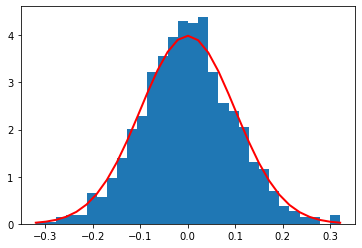

In [41]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Otras escogencias aleatorias - Barajar un juego de cartas
Muchas veces estamos interesados en aleatorizar el orden de un conjunto de elementos. Usaremos `np.random.shuffle ()`, una función que permite mezclar aleatoriamente una secuencia de elementos cualesquiera.


In [42]:
Baraja = [] #generando lista baraja 
# el siguiente ciclo for anida otro ciclo for 
#el ciclo for que esta interno vamos decir que es el primero,
#porque este va a recorrer del 1 al 13 cada uno de los elementos
#en la lista a recorrer en el ciclo 
#for externo el cual sera nuestro segundo ciclo for contandolos de adentro 
#hacia afuara. Ahora bien el metodo appende agrega cada uno de los elementos 
#en la lista baraja 
for i in ["Corazón","Picas","Diamantes","Trébol"]: #for 
    for j in range(13):# esta linea simplemente establece de donde a donde va el ciclo for
        Baraja.append((i,j+1))#esta agrega cada uno de los elementos a la lista 'Baraja'
        #i:agrega el elemento i del segundo ciclo for contando desde adentro a afuera 
        #j agrega los elementos del primer ciclo contando los ciclos de adentro a afuera
        # +1 simplemente hace que el ciclo empiece en 1 y no en cero, si lo cambiara por dos 
        #igual saltaria de uno en uno solo que comenzaria en 2
Baraja

[('Corazón', 1),
 ('Corazón', 2),
 ('Corazón', 3),
 ('Corazón', 4),
 ('Corazón', 5),
 ('Corazón', 6),
 ('Corazón', 7),
 ('Corazón', 8),
 ('Corazón', 9),
 ('Corazón', 10),
 ('Corazón', 11),
 ('Corazón', 12),
 ('Corazón', 13),
 ('Picas', 1),
 ('Picas', 2),
 ('Picas', 3),
 ('Picas', 4),
 ('Picas', 5),
 ('Picas', 6),
 ('Picas', 7),
 ('Picas', 8),
 ('Picas', 9),
 ('Picas', 10),
 ('Picas', 11),
 ('Picas', 12),
 ('Picas', 13),
 ('Diamantes', 1),
 ('Diamantes', 2),
 ('Diamantes', 3),
 ('Diamantes', 4),
 ('Diamantes', 5),
 ('Diamantes', 6),
 ('Diamantes', 7),
 ('Diamantes', 8),
 ('Diamantes', 9),
 ('Diamantes', 10),
 ('Diamantes', 11),
 ('Diamantes', 12),
 ('Diamantes', 13),
 ('Trébol', 1),
 ('Trébol', 2),
 ('Trébol', 3),
 ('Trébol', 4),
 ('Trébol', 5),
 ('Trébol', 6),
 ('Trébol', 7),
 ('Trébol', 8),
 ('Trébol', 9),
 ('Trébol', 10),
 ('Trébol', 11),
 ('Trébol', 12),
 ('Trébol', 13)]

In [43]:
# Shuffle the deck

#np.random.shuffle() una función que permite mezclar aleatoriamente 
#una secuencia de elementos
np.random.shuffle(Baraja)
#En este caso vamos a mezclar de manera aleatorea la lista 'Baraja', 
#la cual fue creada mediante ciclos for en la linea anterior.
Baraja

[('Corazón', 11),
 ('Corazón', 5),
 ('Picas', 6),
 ('Picas', 9),
 ('Trébol', 13),
 ('Diamantes', 11),
 ('Corazón', 9),
 ('Trébol', 9),
 ('Corazón', 13),
 ('Diamantes', 4),
 ('Diamantes', 1),
 ('Diamantes', 10),
 ('Trébol', 3),
 ('Corazón', 10),
 ('Diamantes', 2),
 ('Trébol', 2),
 ('Picas', 11),
 ('Picas', 2),
 ('Trébol', 4),
 ('Picas', 10),
 ('Picas', 1),
 ('Corazón', 12),
 ('Picas', 12),
 ('Diamantes', 7),
 ('Corazón', 2),
 ('Trébol', 7),
 ('Picas', 5),
 ('Picas', 4),
 ('Diamantes', 6),
 ('Trébol', 12),
 ('Corazón', 7),
 ('Trébol', 8),
 ('Diamantes', 12),
 ('Picas', 8),
 ('Diamantes', 5),
 ('Trébol', 1),
 ('Picas', 13),
 ('Trébol', 10),
 ('Trébol', 5),
 ('Corazón', 4),
 ('Corazón', 1),
 ('Diamantes', 8),
 ('Trébol', 6),
 ('Picas', 3),
 ('Corazón', 8),
 ('Diamantes', 9),
 ('Trébol', 11),
 ('Picas', 7),
 ('Corazón', 6),
 ('Corazón', 3),
 ('Diamantes', 13),
 ('Diamantes', 3)]

# Simulaciones - Casos prácticos
*Tomados de [https://github.com/sukruc/statistical-simulation](https://github.com/sukruc/statistical-simulation)*

## Esquema para modelar eventos reales a partir de procesos estocásticos

- Caracterizado por muestreo aleatorio repetido.
- Nos da una solución aproximada.
- Puede ayudar a resolver problemas complejos.

## Pasos de simulación:

1. Definir posibles resultados para variables aleatorias
2. Asignar posibilidades.
3. Definir relaciones entre variables aleatorias.
4. Obtenga múltiples resultados mediante muestreo repetido.
5. Analice los resultados de la muestra.

<span style="color:blue">notas propieas</span>
<br>
<span style="color:green">@miguelmag1</span>
<br>
**proceso estocástico**: es un concepto matemático que sirve para representar magnitudes aleatorias que varían con el tiempo o para caracterizar una sucesión de variables aleatorias (estocásticas) que evolucionan en función de otra variable, generalmente el tiempo.


**Muestreo aleatorio**:  es el que se efectúa teniendo en cuenta que cada miembro de la población tiene la misma probabilidad de ser elegido en la muestra. Con este tipo de muestreo, las muestras son representativas, es posible conocer los posibles errores cometidos y pueden hacerse inferencias estadísticas.

https://es.wikipedia.org/wiki/Proceso_estoc%C3%A1stico#:~:text=En%20la%20teor%C3%ADa%20de%20la,otra%20variable%2C%20generalmente%20el%20tiempo.

- Introducción a las series de tiempo. Métodos paramétricos. Universidad De Medellin. 1 de enero de 2007. ISBN 9789589801079. Consultado el 6 de febrero de 2017.

http://www.juntadeandalucia.es/averroes/centros-tic/18700232/helvia/sitio/upload/6_muestreo_intervalos.pdf

### Sacar pares


Jugar parqués propone un primer reto para todos los jugadores, sacar pares para poder salir de la carcel. <span style="background:#FFFF00">Este inocente hecho lo retrataremos en un modelo de simulación, seguiremos los pasos descritos anteriormente para entender las probabilidades y posibilidades alrededor el juego. </span>

En primer lugar debemos entender que la base del proceso de simulación implica un muestreo aleatorio repetido. <span style="background:#FFFF00"> El primer paso que se refiere a crear una muestra aleatoria consiste en pensar en el lanzamiento de un dado:</span>

In [44]:
#en este bloque de codigo se crea una muestra aleatoria 
p = 1/6 #p: probabilidad de lanzar un dado una vez

#elementos 
#dado: una lista de 1 a 6
# pribabilidad: genera una lista de 6 veces el valor de p 
#lanzamientos: numero de lanzamientos en este caso es 1
dado, probabilidades, lanzamientos = [1,2,3,4,5,6], [p]*6, 1

# Use np.random.choice to throw the die once and record the outcome
#use np.random.choice tirar el dado una vez y registrar el resultado
outcome = np.random.choice(dado, size=lanzamientos, p=probabilidades)
#dado es el array 
#size= int o tupla de ints, opcional Forma de salida. Si la forma dada es, por ejemplo, ``(m, n, k)``, entonces
#Se extraen ``m * n * k`` muestras. El valor predeterminado es Ninguno, en cuyo caso un
#se devuelve un solo valor

#probability: Las probabilidades asociadas con cada entrada en a.
#Si no se proporciona, la muestra supone una distribución uniforme en todos los
#entradas en a


print("Salida del lanzamiento: {}".format(outcome[0]))

Salida del lanzamiento: 4


Observe que el vector de probabilidades se asignan valores justos en la salida del dado. En este sentido podemos manipular las probabilidades del ejercicio. Completamos entonces el paso 2. Ahora vamos a definir la relación entre variables aleatorias.

Muchas veces, nuestra simulación involucrará no solo una, sino múltiples variables aleatorias. Considere un juego en el que le tira dos dados y gana si cada dado muestra el mismo número. Aquí tenemos dos variables aleatorias - los dos dados - y una relación entre cada una de ellas - ganamos si muestran el mismo número, perdemos si no. En realidad, la relación entre variables aleatorias puede ser mucho más compleja, no obstante resolveremos lo que nos propone el diagrama:



![dice_sim](img/dice_sim.png)

In [45]:
dado, probabilidades, num_dados = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(dado, size=num_dados, p=probabilidades) 

if outcomes[0] == outcomes[1]: 
    answer = '¡Pares!' 
else:
    answer = 'Sigue intentando.'

print("Los dados muestran {} y {}. {}".format(outcomes[0], outcomes[1], answer))

Los dados muestran 1 y 4. Sigue intentando.


In [46]:
outcomes

array([1, 4])

Si bien ya somos aptos para crear el juego de sacar pares aún hace falta simular varias opiciones para establecer probabilidades de ganar este juego.

**Ejercicio 6**

¿Cuál es la probabilidad de sacr pares?


In [47]:
dado_1 = [1,2,3,4,5,6]
dado_2 = [1,2,3,4,5,6]
pares_1=[]
pares_2=[]
for i in dado:
    residuo=i%2
    if residuo==0:
        pares_1.append((i))
        pares_2.append((i))
pares_1
pares_2
casos_f= len(pares_1)*len(pares_2)
casos_t=len(dado_1)*len(dado_2)
probabilidad_pares=casos_f/casos_t

print('la probabilidad de obtener dos pares es: ',probabilidad_pares)

la probabilidad de obtener dos pares es:  0.25


**Ejercicio 7**

Simule varios juegos de pares y verifique que la probabilidad anterior es correcta.

In [48]:
dado, probabilidades, num_dados = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(dado, size=num_dados, p=probabilidades) 
tipo=outcomes[0]%2
tipo_2=outcomes[1]%2
if tipo==0 and tipo_2==0: 
    pares=[]
    answer = '¡Pares!' 
    for i in dado:
        residuo=i%2
        if residuo==0:
            pares.append((i))
    print(pares)
    casos_f=len(pares)**2
    casos_t=len(dado)**2
    probabilidad_pares=casos_f/casos_t
    print('la probabilidad de sacar pares es:', probabilidad_pares)
    casos_f
else:
    answer = 'Sigue intentando.'

print("Los dados muestran {} y {}. {}".format(outcomes[0], outcomes[1], answer))

Los dados muestran 2 y 3. Sigue intentando.


# Usando la simulación en toma de decisiones

Según lo anterior, el proceso de simulación se simplifica en el siguiente flujo:

![simulation workflow](img/sim_workflow.png)

Aquí:
- Pasos 1 y 2: definir los resultados de las variables aleatorias y asignar las probabilidades.
- Paso 3: Definir la relación entre los parámetros del modelo.
- Paso 4: muestrear repetidamente las distribuciones A y B para generar resultados.
- Paso 5: Analizar los resultados.

Utilicemos algunas simulaciones para tomar decisiones.

**Simulando un sorteo de lotería**

Ejecutaremos una simulación completa, tomaremos una decisión basada en nuestros resultados observados y aprenderemos a modificar las entradas al modelo de simulación.

En este caso veremos si queremos o no comprar un boleto de lotería. Suponga que tiene la oportunidad de comprar un boleto de lotería que le da una oportunidad de ganar un gran premio de $\$ $ 1 millón. Como hay 1000 boletos en total, su probabilidad de ganar es de 1 en 1000. Cada boleto cuesta  $\$ $ 10. Usemos nuestra comprensión de las simulaciones básicas para simular primero un sorteo de la lotería.

**Ejercicio 8**

Explique el siguiente código, indique lo que almacena

- `gains`
- `probability`
- `outcome`


In [61]:
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000

# Probability of winning
chance_of_winning = 1/num_tickets

# Code to simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("La ganancia de un juego de lotería es {}".format(outcome))

La ganancia de un juego de lotería es [-10]


Explicación linea a linea <span style="color:green">@miguelmag1 & @davidcruz</span>

In [60]:
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
#lottery_ticket_cost  = costo del ticket de loteria
#num_tickets = numero de tickets comprados por la persona
#grand_prize= premio


# Probability of winning
chance_of_winning = 1/num_tickets
#chance_of_winning = probabilidad de ganar

# Code to simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
#ganins= es una lista en donde se guardan el valor en negativo del valor del ticket 
#y se guarda el valor del premio menos el valor del ticket
probability = [1-chance_of_winning, chance_of_winning]
#probability= se guarda una lista con la probabilidad de fracasos que seria 1-chance_of_winning es decir no ganar el premio 
#y se guarda la probabilidad de ganar el premio 1
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)
# outcome= use np.random.choice comprar ticket de loteria 
#size= numero de tickets que se compran 
#p= Las probabilidades asociadas con cada entrada en es decir en este caso a un 
#array llamado probabilidad
#a= es el arreglo del cual se genera una muestra aleatoria a partir de sus elementos
#en este caso el arreglo van a ser las ganancias
print("La ganancia de un juego de lotería es {}".format(outcome))

La ganancia de un juego de lotería es [-10]


## ¿Deberíamos comprar?

En el último ejercicio, simulamos el sorteo aleatorio del billete de lotería una vez. <span style="background:#FFFF00">En este ejercicio, completamos el proceso de simulación repitiendo el proceso varias veces.</span>

Repetir el proceso nos da múltiples resultados. <span style="background:#FFFF00">Podemos pensar en esto como múltiples universos donde ocurrió el mismo sorteo de lotería</span>. Luego, podemos determinar las ganancias promedio en todos estos universos. Si las ganancias promedio son mayores de lo que pagamos por el boleto, entonces tiene sentido comprarlo, de lo contrario, es posible que no queramos comprar el boleto.

Normalmente, así es como se utilizan las simulaciones para evaluar las inversiones comerciales. Después de completar este ejercicio, tendrá las herramientas básicas necesarias para utilizar simulaciones para la toma de decisiones.

1. se repite el proceso de compra y sorteo varias veces.
2. se sacan ganancias promedio en todos los universos.
3. se saca el total pagago en voletos.

In [51]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Pago promedio de {} simulaciones = {}".format(size   , answer))

Pago promedio de 2000 simulaciones = 990.0


In [64]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 1000000
#lottery_ticket_cost = costo ticket
#num_tickets= numero de tickets por sorteo
#grand_prize = premio

chance_of_winning = 1/num_tickets
#chance_of_winning = probabilidad de ganar 

size = 2000
#size = cantidad de tickets comprados 

payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
#payoffs=es una lista en donde se guardan el valor en negativo del valor del ticket 
#y se guarda el valor del premio menos el valor del ticket

probs = [1-chance_of_winning, chance_of_winning]
#probability= se guarda una lista con la probabilidad de fracasos que seria 1-chance_of_winning es decir no ganar el premio 
#y se guarda la probabilidad de ganar el premio 1


outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)
print(outcomes)
# Mean of outcomes.
answer = np.mean(outcomes)
gastos_en_tickets=size*lottery_ticket_cost
print("Pago promedio de {} simulaciones = {}".format(gastos_en_tickets, answer))

[-10 -10 -10 ... -10 -10 -10]
Pago promedio de 20000 simulaciones = 990.0


**Ejercicio 9**

¿Qué visualizaciones son adecuadas para indicar los resultados de esta simulación?
- diagrama de barras 
- un diagrama de torta 
si se decea replicar varias veces el promedio de las ganancias es decir hacer multiples sorteos se podria usar una serie de tiempo

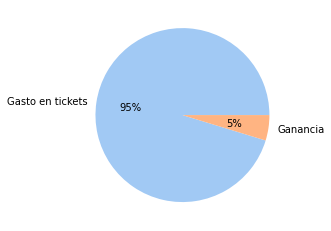

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [gastos_en_tickets,answer]
labels = ['Gasto en tickets', 'Ganancia']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

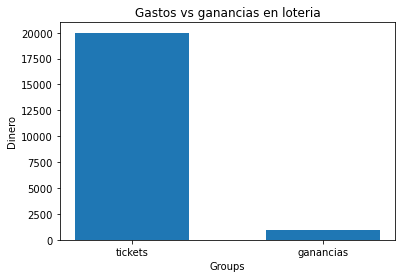

In [66]:
X = ['tickets','ganancias']
X_axis = np.arange(len(X))
plt.bar(X_axis , data, 0.6)
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Dinero")
plt.title("Gastos vs ganancias en loteria")
plt.show()

## Calculando un precio de lotería de equilibrio

Las simulaciones nos permiten hacer preguntas más matizadas que no necesariamente tienen una solución analítica fácil. <span style="background:#FFFF00">En lugar de resolver una fórmula matemática compleja, obtenemos directamente múltiples resultados de muestra. Podemos realizar experimentos modificando las entradas y estudiando cómo esos cambios impactan en el sistema</span>. Por ejemplo, una vez que tengamos un modelo moderadamente razonable de patrones climáticos globales, podríamos evaluar el impacto del aumento de las emisiones de gases de efecto invernadero.

En el ejemplo de la lotería, es posible que deseemos saber qué tan caro debe ser el boleto para que no tenga sentido comprarlo. <span style="background:#FFFF00">Para entender esto, necesitamos modificar el costo del boleto para ver cuándo la recompensa esperada es negativa.</span>

In [67]:
import numpy as np
sims, lottery_ticket_cost = 10000, 0

#sims = numero de tickets que se van a comprar
#gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
#outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)
# outcome= use np.random.choice comprar ticket de loteria 
#size= numero de tickets que se compran 
#probability = [1-chance_of_winning, chance_of_winning]
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    
    print('aqui inicia el precio',lottery_ticket_cost,grand_prize)
    
    #outcomes= hace una simulacion de comprar ticket de loteria 
    
    #size = la cantidad de simulaciones
    #p= el arreglo de las probabilidades tanto de fracaso, como de exito    
    if outcomes.mean() < 0:
        #cuando el promedio de la respuesta esperada sea negativa pare el ciclo
        break
    else:
        print('este es el ourcomes',outcomes)
        lottery_ticket_cost += 1
        #incremente +1 el valor del ticket
        print(lottery_ticket_cost)
answer = lottery_ticket_cost - 1
print('esta es la respuest', answer)
print("El precio más alto al que tiene sentido comprar el boleto es {}".format(answer))

aqui inicia el precio 0 1000000
este es el ourcomes [0 0 0 ... 0 0 0]
1
aqui inicia el precio 1 1000000
este es el ourcomes [-1 -1 -1 ... -1 -1 -1]
2
aqui inicia el precio 2 1000000
este es el ourcomes [-2 -2 -2 ... -2 -2 -2]
3
aqui inicia el precio 3 1000000
este es el ourcomes [-3 -3 -3 ... -3 -3 -3]
4
aqui inicia el precio 4 1000000
este es el ourcomes [-4 -4 -4 ... -4 -4 -4]
5
aqui inicia el precio 5 1000000
este es el ourcomes [-5 -5 -5 ... -5 -5 -5]
6
aqui inicia el precio 6 1000000
este es el ourcomes [-6 -6 -6 ... -6 -6 -6]
7
aqui inicia el precio 7 1000000
este es el ourcomes [-7 -7 -7 ... -7 -7 -7]
8
aqui inicia el precio 8 1000000
este es el ourcomes [-8 -8 -8 ... -8 -8 -8]
9
aqui inicia el precio 9 1000000
este es el ourcomes [-9 -9 -9 ... -9 -9 -9]
10
aqui inicia el precio 10 1000000
este es el ourcomes [-10 -10 -10 ... -10 -10 -10]
11
aqui inicia el precio 11 1000000
este es el ourcomes [-11 -11 -11 ... -11 -11 -11]
12
aqui inicia el precio 12 1000000
este es el ourcomes 

aqui inicia el precio 182 1000000
este es el ourcomes [-182 -182 -182 ... -182 -182 -182]
183
aqui inicia el precio 183 1000000
este es el ourcomes [-183 -183 -183 ... -183 -183 -183]
184
aqui inicia el precio 184 1000000
este es el ourcomes [-184 -184 -184 ... -184 -184 -184]
185
aqui inicia el precio 185 1000000
este es el ourcomes [-185 -185 -185 ... -185 -185 -185]
186
aqui inicia el precio 186 1000000
este es el ourcomes [-186 -186 -186 ... -186 -186 -186]
187
aqui inicia el precio 187 1000000
este es el ourcomes [-187 -187 -187 ... -187 -187 -187]
188
aqui inicia el precio 188 1000000
este es el ourcomes [-188 -188 -188 ... -188 -188 -188]
189
aqui inicia el precio 189 1000000
este es el ourcomes [-189 -189 -189 ... -189 -189 -189]
190
aqui inicia el precio 190 1000000
este es el ourcomes [-190 -190 -190 ... -190 -190 -190]
191
aqui inicia el precio 191 1000000
este es el ourcomes [-191 -191 -191 ... -191 -191 -191]
192
aqui inicia el precio 192 1000000
este es el ourcomes [-192 

aqui inicia el precio 383 1000000
este es el ourcomes [-383 -383 -383 ... -383 -383 -383]
384
aqui inicia el precio 384 1000000
este es el ourcomes [-384 -384 -384 ... -384 -384 -384]
385
aqui inicia el precio 385 1000000
este es el ourcomes [-385 -385 -385 ... -385 -385 -385]
386
aqui inicia el precio 386 1000000
este es el ourcomes [-386 -386 -386 ... -386 -386 -386]
387
aqui inicia el precio 387 1000000
este es el ourcomes [-387 -387 -387 ... -387 -387 -387]
388
aqui inicia el precio 388 1000000
este es el ourcomes [-388 -388 -388 ... -388 -388 -388]
389
aqui inicia el precio 389 1000000
este es el ourcomes [-389 -389 -389 ... -389 -389 -389]
390
aqui inicia el precio 390 1000000
este es el ourcomes [-390 -390 -390 ... -390 -390 -390]
391
aqui inicia el precio 391 1000000
este es el ourcomes [-391 -391 -391 ... -391 -391 -391]
392
aqui inicia el precio 392 1000000
este es el ourcomes [-392 -392 -392 ... -392 -392 -392]
393
aqui inicia el precio 393 1000000
este es el ourcomes [-393 

**Ejercicio 10**

¿Cómo innterpreta el rendimiento de las anteriores simulaciones? la simulación anterior funciona bastante bien, pues se detiene justo antes que el la recompensa esperada sea cero
<br>
¿Basta con esa cantidad? Haciendo varias pruebas se puedo identificar que si se incrementa el numero de las boletas vendidas se incrementa el valor para que la recompensa esperada sea negativa.
<br>
¿Que pasa si se vuelve a correr la celda anterior? Si se vuelve a correr la celda se cambiara el valor del boleto maximo antes de que su respuesta esperada sea negativa
<br>
¿Se puede mejorar los resultados de este ejercicio? se podira mejorar haciendo variar la cantidad de boletas que se pueden comprar para poder observar de una mejor manera como esta variable influye sobre el costo del boleto para cuándo la recompensa esperada es negativa.

In [68]:
sims, lottery_ticket_cost = 4000, 0

#sims = numero de tickets que se van a comprar
#gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
#outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)
# outcome= use np.random.choice comprar ticket de loteria 
#size= numero de tickets que se compran 
#probability = [1-chance_of_winning, chance_of_winning]
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    
    #print('aqui inicia el precio',lottery_ticket_cost,grand_prize)
    
    #outcomes= hace una simulacion de comprar ticket de loteria 
    
    #size = la cantidad de simulaciones
    #p= el arreglo de las probabilidades tanto de fracaso, como de exito    
    if outcomes.mean() < 0:
        #cuando el promedio de la respuesta esperada sea negativa pare el ciclo
        break
    else:
        #print('este es el ourcomes',outcomes)
        lottery_ticket_cost += 1
        #incremente +1 el valor del ticket
        #print(lottery_ticket_cost)
answer = lottery_ticket_cost - 1
print('esta es la respuest', answer)
print("El precio más alto al que tiene sentido comprar el boleto es {}".format(answer))

esta es la respuest 16
El precio más alto al que tiene sentido comprar el boleto es 16
